In [1]:
from sklearn.decomposition import PCA
import numpy as np
from pandas import DataFrame 
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.decomposition import FastICA
from sklearn.manifold import TSNE 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import LocallyLinearEmbedding
from sklearn import manifold 
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split

In [2]:
Y= np.loadtxt('Y.txt')
# Here is the data of wavelength of mangroves data, but I don't know why I can't upload the to this file, but I can upload it on my
# own jutper notebook, so I woulad also sent the data to you, but if you want to run the code, I thik you should change the code below.
Wavelength= pd.read_csv('mangroves color.csv')

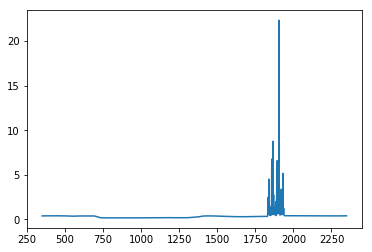

In [3]:
# in the first plot, can find noisy data in range (1800,2000), here are two thoughts to solve this, one is use LLE to reduce dimension 
# to the other is to remove data here.
Mean=np.mean(Wavelength,axis=0)
Sigma=np.std(Wavelength,axis=0)
T=Sigma/Mean
plt.plot(Y[0:2000],Sigma[0:2000])

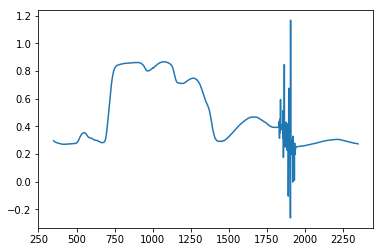

In [4]:
plt.plot(Y[0:2000],Mean[0:2000])

In [5]:
# As required, I try teo wavelength range here,(400,900), (400,2400)
Y[50],Y[550],Y[2050]

(400.0, 900.0, 2400.0)

In [6]:
x=Wavelength.T
wavelength2=np.vstack((x[0:1400],x[1650:2050])).T
wavelength2=wavelength2[0:841]
wavelength2.shape

(841, 1800)

In [7]:
x=Wavelength.T
wavelength1=x[50:550].T
wavelength1=wavelength1[0:841]
wavelength1.shape

(841, 500)

In [8]:
# target for four class(cloor).
from numpy import array
target=array([ "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W","W",
               "W","W","W","W","W","W","W","W","W","W",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R","R",
               "R","R","R","R","R","R","R","R","R","R",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B","B",
               "M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M","M",
               "M","M","M","M","M","M","M","M","M","M","M" ])

In [9]:
# I try different methods to reduce the dimension here.
# There are some unlabeled data, and I want to mark them at last. 
# In my idea, I should reduce the dimension and then find the good classifier using the labeled data, and fit this best method to 
# unlabeled.
# So I should reduce the dimension for all the samples,not just the labeled data.
# I try some dimensions I should use and I showed their plots in some meetings. In this code I removed them, this is the next step 
# in my work.
# but these dimensions are ok and I have roughly compared them.

In [10]:
# these two are linear method.
pca=PCA(n_components=20)
X_PCA1=pca.fit_transform(wavelength1)
X_PCA2=pca.fit_transform(wavelength2)

ICA = FastICA(n_components=20,random_state=100) 
X_ICA1=ICA.fit_transform(wavelength1)
X_ICA2=ICA.fit_transform(wavelength2)

In [11]:
# This is nonlinear method
lle1=LocallyLinearEmbedding(n_components=20,n_neighbors=50)
lle2=LocallyLinearEmbedding(n_components=20,n_neighbors=50)
X_lle1=lle1.fit_transform(wavelength1)
X_lle2=lle2.fit_transform(wavelength2)

In [12]:
# split train data,and test data at random
xpca1_train, xpca1_test, ypca1_train, ypca1_test = train_test_split(X_PCA1,target, test_size=0.3)
xIca1_train, xIca1_test, yIca1_train, yIca1_test = train_test_split(X_ICA1,target, test_size=0.3)
xlle1_train, xlle1_test, ylle1_train, ylle1_test = train_test_split(X_lle1,target, test_size=0.3)
x1_train, x1_test, y1_train, y1_test = train_test_split(wavelength1,target, test_size=0.3)

xpca2_train, xpca2_test, ypca2_train, ypca2_test = train_test_split(X_PCA2,target, test_size=0.3)
xIca2_train, xIca2_test, yIca2_train, yIca2_test = train_test_split(X_ICA2,target, test_size=0.3)
xlle2_train, xlle2_test, ylle2_train, ylle2_test = train_test_split(X_lle2,target, test_size=0.3)
x2_train, x2_test, y2_train, y2_test = train_test_split(wavelength2,target, test_size=0.3)

In [13]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.model_selection import RandomizedSearchCV
# SVM model for two range (400,900) , (400,2400)
# Then is SVM model.

In [14]:
SVM= SVC(kernel='rbf')
# when choose kernel, I find linear and sigmod is bad, so I choose rbf, which is often used.
# for gussian kernel (rbf), there are C and gamma to choose
# I first limit their range, then find the good combination roughly.

In [15]:
SVM= SVC(kernel='rbf')
distributions = dict(C=np.logspace(-1,1,40),gamma=np.logspace(-1,1,40))
clf = RandomizedSearchCV(SVM, distributions, random_state=42)
search1 = clf.fit(xlle1_train, ylle1_train)
search1.best_params_ 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'gamma': 8.886238162743403, 'C': 3.455107294592218}

In [16]:
SVM= SVC(kernel='rbf')
distributions = dict(C=np.logspace(-1,1,40),gamma=np.logspace(-1,1,40))
clf = RandomizedSearchCV(SVM, distributions, random_state=42)
search1 = clf.fit(xlle2_train, ylle2_train)
search1.best_params_ 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'gamma': 8.886238162743403, 'C': 3.455107294592218}

In [17]:
SVM= SVC(kernel='rbf')
distributions = dict(C=np.logspace(-1,1,40),gamma=np.logspace(-1,1,40))
clf = RandomizedSearchCV(SVM, distributions, random_state=42)
search1 = clf.fit(x1_train, y1_train)
search1.best_params_ 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'gamma': 0.9426684551178852, 'C': 7.017038286703826}

In [18]:
SVM= SVC(kernel='rbf')
distributions = dict(C=np.logspace(-1,1,40),gamma=np.logspace(-1,1,40))
clf = RandomizedSearchCV(SVM, distributions, random_state=42)
search1 = clf.fit(x2_train, y2_train)
search1.best_params_ 

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'gamma': 0.20309176209047358, 'C': 2.728333376486768}

In [19]:
clf1= SVC(C=7,kernel='rbf',gamma=1)
clf1.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, clf1.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, clf1.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, clf1.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, clf1.predict(xpca1_test)))

accuracy_train： 0.9370748299319728
accuracy_test： 0.8774703557312253
Kappa_train： 0.9080659883033028
Kappa_test： 0.821766203072448


In [20]:
Clf1= SVC(C=6,kernel='rbf',gamma=1)
Clf1.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, Clf1.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, Clf1.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, Clf1.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, Clf1.predict(xpca2_test)))

accuracy_train： 0.9965986394557823
accuracy_test： 0.9525691699604744
Kappa_train： 0.9950690996913995
Kappa_test： 0.929874809442417


In [21]:
clf2= SVC(C=3,kernel='rbf',gamma=0.4)
Clf2= SVC(C=3,kernel='rbf',gamma=1)

In [22]:
clf2.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, clf2.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, clf2.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, clf2.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, clf2.predict(xIca1_test)))

accuracy_train： 0.9455782312925171
accuracy_test： 0.9130434782608695
Kappa_train： 0.920845392744161
Kappa_test： 0.8699897225077081


In [23]:
Clf2.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, Clf2.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, Clf2.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, Clf2.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, Clf2.predict(xIca2_test)))

accuracy_train： 0.95578231292517
accuracy_test： 0.9644268774703557
Kappa_train： 0.9354293727086889
Kappa_test： 0.9479958890030833


In [24]:
clf3= SVC(C=3,kernel='rbf',gamma=10)
Clf3= SVC(C=3,kernel='rbf',gamma=6)

In [25]:
clf3.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, clf3.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, clf3.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, clf3.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, clf3.predict(xlle1_test)))

accuracy_train： 0.9149659863945578
accuracy_test： 0.924901185770751
Kappa_train： 0.8773691938067272
Kappa_test： 0.886720867208672


In [26]:
Clf3.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, Clf3.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, Clf3.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, Clf3.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, Clf3.predict(xlle2_test)))

accuracy_train： 0.9846938775510204
accuracy_test： 0.9762845849802372
Kappa_train： 0.9776448522329801
Kappa_test： 0.965578231292517


In [27]:
clf= SVC(C=1,kernel='rbf',gamma=3)
Clf= SVC(C=1,kernel='rbf',gamma=0.2)

In [28]:
clf.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, clf.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, clf.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, clf.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, clf.predict(x1_test)))

accuracy_train： 0.8673469387755102
accuracy_test： 0.8142292490118577
Kappa_train： 0.8071612371550144
Kappa_test： 0.7248854749895887


In [29]:
Clf.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, Clf.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, Clf.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, Clf.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, Clf.predict(x2_test)))

accuracy_train： 0.9659863945578231
accuracy_test： 0.9446640316205533
Kappa_train： 0.9504157320425682
Kappa_test： 0.9194267515923567


In [30]:
# this decision tree model, I am sure it is bad than Random forest and GBDT, so no need to consider much.
from sklearn import tree
clf_tree = tree.DecisionTreeClassifier(max_depth=8)

In [31]:
clf_tree.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, clf_tree.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, clf_tree.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, clf_tree.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, clf_tree.predict(x1_test)))

accuracy_train： 0.9217687074829932
accuracy_test： 0.7193675889328063
Kappa_train： 0.8861649698872508
Kappa_test： 0.5855999261771287


In [32]:
clf_tree.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, clf_tree.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, clf_tree.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, clf_tree.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, clf_tree.predict(x2_test)))

accuracy_train： 0.9914965986394558
accuracy_test： 0.8142292490118577
Kappa_train： 0.9875954601071685
Kappa_test： 0.73001998001998


In [33]:
clf_tree.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, clf_tree.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, clf_tree.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, clf_tree.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, clf_tree.predict(xpca1_test)))

accuracy_train： 0.9880952380952381
accuracy_test： 0.8458498023715415
Kappa_train： 0.9826141317203393
Kappa_test： 0.7758620689655172


In [34]:
clf_tree.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, clf_tree.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, clf_tree.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, clf_tree.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, clf_tree.predict(xpca2_test)))

accuracy_train： 0.9778911564625851
accuracy_test： 0.8695652173913043
Kappa_train： 0.9678530424799081
Kappa_test： 0.8067629495903347


In [35]:
clf_tree.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, clf_tree.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, clf_tree.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, clf_tree.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, clf_tree.predict(xIca1_test)))

accuracy_train： 0.9846938775510204
accuracy_test： 0.83399209486166
Kappa_train： 0.9778393815797187
Kappa_test： 0.75432917947888


In [36]:
clf_tree.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, clf_tree.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, clf_tree.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, clf_tree.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, clf_tree.predict(xIca2_test)))

accuracy_train： 0.9914965986394558
accuracy_test： 0.8181818181818182
Kappa_train： 0.9876072249035767
Kappa_test： 0.7325642852218673


In [37]:
clf_tree.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, clf_tree.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, clf_tree.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, clf_tree.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, clf_tree.predict(xlle1_test)))

accuracy_train： 0.9217687074829932
accuracy_test： 0.766798418972332
Kappa_train： 0.8871354058001252
Kappa_test： 0.6482467716090112


In [38]:
clf_tree.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, clf_tree.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, clf_tree.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, clf_tree.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, clf_tree.predict(xlle2_test)))

accuracy_train： 0.9829931972789115
accuracy_test： 0.8932806324110671
Kappa_train： 0.9751683946029266
Kappa_test： 0.8445309299467432


In [39]:
# Random Forest is a improvement of Decision Tree , too avoid overfitting, I choose set the max depth.
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
randomforest = RandomForestClassifier(max_depth=8)

In [40]:
randomforest.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, randomforest.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, randomforest.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, randomforest.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, randomforest.predict(xpca1_test)))

accuracy_train： 0.9982993197278912
accuracy_test： 0.9209486166007905
Kappa_train： 0.9975198245318037
Kappa_test： 0.8854322329393651


C:\Users\user\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [41]:
randomforest.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, randomforest.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, randomforest.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, randomforest.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, randomforest.predict(xpca2_test)))

accuracy_train： 0.9948979591836735
accuracy_test： 0.924901185770751
Kappa_train： 0.9925989015830127
Kappa_test： 0.8888863205584577


In [42]:
randomforest.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, randomforest.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, randomforest.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, randomforest.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, randomforest.predict(xIca1_test)))

accuracy_train： 0.9965986394557823
accuracy_test： 0.9169960474308301
Kappa_train： 0.9950702985487563
Kappa_test： 0.876596831885539


In [43]:
randomforest.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, randomforest.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, randomforest.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, randomforest.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, randomforest.predict(xIca2_test)))

accuracy_train： 0.9948979591836735
accuracy_test： 0.8814229249011858
Kappa_train： 0.9925656197845547
Kappa_test： 0.8235376174090951


In [44]:
randomforest.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, randomforest.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, randomforest.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, randomforest.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, randomforest.predict(xlle1_test)))

accuracy_train： 0.9693877551020408
accuracy_test： 0.857707509881423
Kappa_train： 0.9558379891764687
Kappa_test： 0.7851177275515501


In [45]:
randomforest.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, randomforest.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, randomforest.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, randomforest.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, randomforest.predict(xlle2_test)))

accuracy_train： 0.9948979591836735
accuracy_test： 0.924901185770751
Kappa_train： 0.9925563652782291
Kappa_test： 0.8903037356518564


In [46]:
randomforest.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, randomforest.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, randomforest.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, randomforest.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, randomforest.predict(x1_test)))

accuracy_train： 0.9302721088435374
accuracy_test： 0.7509881422924901
Kappa_train： 0.8984939137610893
Kappa_test： 0.6336367397600331


In [47]:
randomforest.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, randomforest.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, randomforest.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, randomforest.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, randomforest.predict(x2_test)))

accuracy_train： 0.9880952380952381
accuracy_test： 0.8893280632411067
Kappa_train： 0.9826532590463507
Kappa_test： 0.8388535031847133


In [48]:
# The random forset used bagging to improve the method of decision tree, while the GBDT used the boosting to improve .
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
GradientBoosting1 = GradientBoostingClassifier(max_depth=3,n_estimators=50,learning_rate=0.05)
GradientBoosting = GradientBoostingClassifier(max_depth=4,n_estimators=40,learning_rate=0.03)

In [49]:
GradientBoosting1.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, GradientBoosting1.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, GradientBoosting1.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, GradientBoosting1.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, GradientBoosting1.predict(x1_test)))

accuracy_train： 0.9268707482993197
accuracy_test： 0.7747035573122529
Kappa_train： 0.8935670446796151
Kappa_test： 0.6682158058207753


In [50]:
GradientBoosting1.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, GradientBoosting1.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, GradientBoosting1.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, GradientBoosting1.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, GradientBoosting1.predict(x2_test)))

accuracy_train： 0.9778911564625851
accuracy_test： 0.8774703557312253
Kappa_train： 0.9677552707730467
Kappa_test： 0.8220412053004175


In [51]:
GradientBoosting1.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, GradientBoosting1.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, GradientBoosting1.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, GradientBoosting1.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, GradientBoosting1.predict(xpca1_test)))

accuracy_train： 0.9948979591836735
accuracy_test： 0.9525691699604744
Kappa_train： 0.9925594735954109
Kappa_test： 0.931072061027108


In [53]:
GradientBoosting.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, GradientBoosting.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, GradientBoosting.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, GradientBoosting.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, GradientBoosting.predict(xpca2_test)))

accuracy_train： 0.9965986394557823
accuracy_test： 0.9367588932806324
Kappa_train： 0.9950648783845031
Kappa_test： 0.9066872593992762


In [54]:
GradientBoosting1.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, GradientBoosting1.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, GradientBoosting1.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, GradientBoosting1.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, GradientBoosting1.predict(xIca1_test)))

accuracy_train： 1.0
accuracy_test： 0.9565217391304348
Kappa_train： 1.0
Kappa_test： 0.935614473440681


In [55]:
GradientBoosting1.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, GradientBoosting1.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, GradientBoosting1.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, GradientBoosting1.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, GradientBoosting1.predict(xIca2_test)))

accuracy_train： 1.0
accuracy_test： 0.8972332015810277
Kappa_train： 1.0
Kappa_test： 0.8493392272279608


In [56]:
GradientBoosting1.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, GradientBoosting1.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, GradientBoosting1.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, GradientBoosting1.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, GradientBoosting1.predict(xlle1_test)))

accuracy_train： 0.9591836734693877
accuracy_test： 0.8853754940711462
Kappa_train： 0.9410511541642648
Kappa_test： 0.8274783671933785


In [57]:
GradientBoosting.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, GradientBoosting.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, GradientBoosting.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, GradientBoosting.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, GradientBoosting.predict(xlle2_test)))

accuracy_train： 0.9914965986394558
accuracy_test： 0.932806324110672
Kappa_train： 0.9875869756130514
Kappa_test： 0.9023454351429285


In [58]:
# I can also use sklearn to duild Netural Network, but it can be difficult to tell the meaning of the net.
# also the best net is difficult to find, I can just try some and find a roughly suitable one.
# I also find for DNN, reduce dimension is useless since the netural network can do this.

In [59]:
from sklearn.neural_network import MLPClassifier
MLP1=MLPClassifier(random_state=1,activation ="relu",solver="lbfgs",max_iter=1000,beta_1=0.8,beta_2=0.8,hidden_layer_sizes=(40, ))
MLP2=MLPClassifier(random_state=1,activation ="relu",solver="lbfgs",max_iter=1000,beta_1=0.7,beta_2=0.7,hidden_layer_sizes=(20, ))

In [60]:
MLP1.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, MLP1.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, MLP1.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, MLP1.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, MLP1.predict(x1_test)))

accuracy_train： 0.7619047619047619
accuracy_test： 0.7430830039525692
Kappa_train： 0.652469065440683
Kappa_test： 0.6206371542596139


In [61]:
print (MLP1.n_layers_)
print (MLP1.loss_)

3
0.596435051333755


In [62]:
MLP2.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, MLP2.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, MLP2.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, MLP2.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, MLP2.predict(x2_test)))

accuracy_train： 0.9030612244897959
accuracy_test： 0.8656126482213439
Kappa_train： 0.8587872455170554
Kappa_test： 0.8058326937835764


In [63]:
print (MLP2.n_layers_)
print (MLP2.loss_)

3
0.25534011329972733


In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [67]:
from pandas import DataFrame
from xgboost.sklearn import XGBClassifier
from xgboost import plot_tree

C:\Users\user\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\user\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [68]:
# Then try a improvement of xgboost.

In [69]:
xgboost = XGBClassifier(
    n_estimators=50,
    learning_rate =0.3,
    max_depth=4,
    min_child_weight=1,
    gamma=0.2,
    subsample=0.6,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=12,
    reg_lambda=1,
    seed=27)

In [70]:
xgboost.fit(x1_train, y1_train)
print ('accuracy_train：', accuracy_score(y1_train, xgboost.predict(x1_train)))
print ('accuracy_test：', accuracy_score(y1_test, xgboost.predict(x1_test)))

print ('Kappa_train：', cohen_kappa_score(y1_train, xgboost.predict(x1_train)))
print ('Kappa_test：', cohen_kappa_score(y1_test, xgboost.predict(x1_test)))

accuracy_train： 1.0
accuracy_test： 0.83399209486166
Kappa_train： 1.0
Kappa_test： 0.7565970313358988


In [71]:
xgboost.fit(x2_train, y2_train)
print ('accuracy_train：', accuracy_score(y2_train, xgboost.predict(x2_train)))
print ('accuracy_test：', accuracy_score(y2_test, xgboost.predict(x2_test)))

print ('Kappa_train：', cohen_kappa_score(y2_train, xgboost.predict(x2_train)))
print ('Kappa_test：', cohen_kappa_score(y2_test, xgboost.predict(x2_test)))

accuracy_train： 1.0
accuracy_test： 0.924901185770751
Kappa_train： 1.0
Kappa_test： 0.8907897128316976


In [72]:
xgboost.fit(xpca1_train, ypca1_train)
print ('accuracy_train：', accuracy_score(ypca1_train, xgboost.predict(xpca1_train)))
print ('accuracy_test：', accuracy_score(ypca1_test, xgboost.predict(xpca1_test)))

print ('Kappa_train：', cohen_kappa_score(ypca1_train, xgboost.predict(xpca1_train)))
print ('Kappa_test：', cohen_kappa_score(ypca1_test, xgboost.predict(xpca1_test)))

accuracy_train： 1.0
accuracy_test： 0.9881422924901185
Kappa_train： 1.0
Kappa_test： 0.9827984770193092


In [73]:
xgboost.fit(xpca2_train, ypca2_train)
print ('accuracy_train：', accuracy_score(ypca2_train, xgboost.predict(xpca2_train)))
print ('accuracy_test：', accuracy_score(ypca2_test, xgboost.predict(xpca2_test)))

print ('Kappa_train：', cohen_kappa_score(ypca2_train, xgboost.predict(xpca2_train)))
print ('Kappa_test：', cohen_kappa_score(ypca2_test, xgboost.predict(xpca2_test)))

accuracy_train： 1.0
accuracy_test： 0.9644268774703557
Kappa_train： 1.0
Kappa_test： 0.9474437391806116


In [74]:
xgboost.fit(xIca1_train, yIca1_train)
print ('accuracy_train：', accuracy_score(yIca1_train, xgboost.predict(xIca1_train)))
print ('accuracy_test：', accuracy_score(yIca1_test, xgboost.predict(xIca1_test)))

print ('Kappa_train：', cohen_kappa_score(yIca1_train, xgboost.predict(xIca1_train)))
print ('Kappa_test：', cohen_kappa_score(yIca1_test, xgboost.predict(xIca1_test)))

accuracy_train： 1.0
accuracy_test： 0.9762845849802372
Kappa_train： 1.0
Kappa_test： 0.9648611111111112


In [75]:
xgboost.fit(xIca2_train, yIca2_train)
print ('accuracy_train：', accuracy_score(yIca2_train, xgboost.predict(xIca2_train)))
print ('accuracy_test：', accuracy_score(yIca2_test, xgboost.predict(xIca2_test)))

print ('Kappa_train：', cohen_kappa_score(yIca2_train, xgboost.predict(xIca2_train)))
print ('Kappa_test：', cohen_kappa_score(yIca2_test, xgboost.predict(xIca2_test)))

accuracy_train： 1.0
accuracy_test： 0.9486166007905138
Kappa_train： 1.0
Kappa_test： 0.9248983879070192


In [76]:
xgboost.fit(xlle1_train, ylle1_train)
print ('accuracy_train：', accuracy_score(ylle1_train, xgboost.predict(xlle1_train)))
print ('accuracy_test：', accuracy_score(ylle1_test, xgboost.predict(xlle1_test)))

print ('Kappa_train：', cohen_kappa_score(ylle1_train, xgboost.predict(xlle1_train)))
print ('Kappa_test：', cohen_kappa_score(ylle1_test, xgboost.predict(xlle1_test)))

accuracy_train： 0.9982993197278912
accuracy_test： 0.9130434782608695
Kappa_train： 0.9975480895531101
Kappa_test： 0.8693059077674462


In [77]:
xgboost.fit(xlle2_train, ylle2_train)
print ('accuracy_train：', accuracy_score(ylle2_train, xgboost.predict(xlle2_train)))
print ('accuracy_test：', accuracy_score(ylle2_test, xgboost.predict(xlle2_test)))

print ('Kappa_train：', cohen_kappa_score(ylle2_train, xgboost.predict(xlle2_train)))
print ('Kappa_test：', cohen_kappa_score(ylle2_test, xgboost.predict(xlle2_test)))

accuracy_train： 1.0
accuracy_test： 0.9604743083003953
Kappa_train： 1.0
Kappa_test： 0.942587423695736


In [78]:
# from these trying, I can find the xgboost has the best effect.
# but pca and Ica are both good, so consider further for these two methods.
# first consider the dimension to choose.
# The get the mean of accuracy.

In [79]:
# PCA
pca=PCA(n_components=0.99)
X_Pca1=pca.fit_transform(wavelength1)
X_Pca2=pca.fit_transform(wavelength2)
X_Pca1.shape, X_Pca2.shape

((841, 4), (841, 5))

In [80]:
xgboost = XGBClassifier(
    n_estimators=50,
    learning_rate =0.3,
    max_depth=4,
    min_child_weight=1,
    gamma=0.2,
    subsample=0.6,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=12,
    reg_lambda=1,
    seed=27)

In [81]:
from sklearn.metrics import accuracy_score
summary=0
n=100
for i in range(0,100):
    xpca1_train, xpca1_test, ypca1_train, ypca1_test = train_test_split(X_Pca1,target, test_size=0.3)
    xgboost.fit(xpca1_train, ypca1_train)
    summary = accuracy_score(ypca1_test, xgboost.predict(xpca1_test))+summary
mean=summary/n
mean

0.7339920948616601

In [82]:
from sklearn.metrics import accuracy_score
summary=0
n=100
for i in range(0,100):
    xpca2_train, xpca2_test, ypca2_train, ypca2_test = train_test_split(X_Pca2,target, test_size=0.3)
    xgboost.fit(xpca2_train, ypca2_train)
    summary = accuracy_score(ypca2_test, xgboost.predict(xpca2_test))+summary
mean=summary/n
mean

0.8728458498023716

In [83]:
# Then can find the effect is not good, so now consider the ICA method.

In [85]:
scores=[]
a=0
for i in range(2,25):
    ICA1 = FastICA(n_components=i,random_state=100) 
    X_ICA1=ICA1.fit_transform(wavelength1)
    a = cross_val_score(xgboost, X_ICA1,target, cv=30) 
    scores.append(sum(a)/30)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\decomposition\fastica_.py:121: ConvergenceWarning: FastICA did not converge. Consider 

In [86]:
max_index1 = scores.index(max(scores))
n1 = max_index1 +2
n1

20

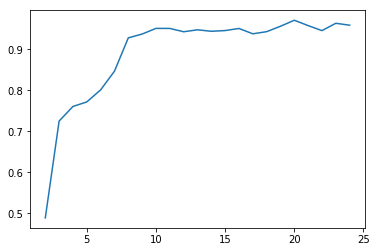

In [87]:
N=array([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.plot(N,scores)

In [88]:
# so I can find the dimension can be choose as  20 , when the wavelength is in the range of (400nm,900nm).

In [89]:
ICA1 = FastICA(n_components=20,random_state=100) 
X_ICA1=ICA1.fit_transform(wavelength1)
scores = cross_val_score(xgboost , X_ICA1,target, cv=30)
sum(scores)/30

0.9713580246913579

In [90]:
# another method to calculate the mean accuracy.

In [136]:
ICA1 = FastICA(n_components=20,random_state=100) 
X_ICA1=ICA1.fit_transform(wavelength1)
summary=0
n=50
for j in range(0,50):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA1,target, test_size=0.25)
    xgboost.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, xgboost.predict(xIca_test))+summary
a = summary/n
a

0.9598104265402846

In [92]:
# Now can find the accuracy is around 0.96.

In [93]:
Scores=[]
b=0
for i in range(2,25):
    ICA2 = FastICA(n_components=i,random_state=100) 
    X_ICA2=ICA2.fit_transform(wavelength2)
    b = cross_val_score(xgboost, X_ICA2,target, cv=30) 
    Scores.append(sum(b)/30)

In [94]:
max_index2 = Scores.index(max(Scores))
n2 = max_index2 + 2
n2

24

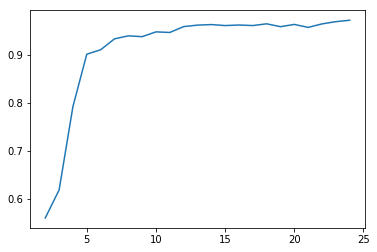

In [95]:
N=array([2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24])
plt.plot(N,Scores)

In [96]:
# so I can find the dimension can be choose as 24 , when the wavelength is (400nm,2400nm).

In [97]:
ICA2 = FastICA(n_components=24,random_state=100) 
X_ICA2=ICA2.fit_transform(wavelength2)
scores = cross_val_score(xgboost, X_ICA2,target, cv=30)
sum(scores)/30

0.9727160493827162

In [98]:
ICA2 = FastICA(n_components=24,random_state=100) 
X_ICA2=ICA2.fit_transform(wavelength2)
summary=0
n=50
for j in range(0,50):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA2,target, test_size=0.25)
    xgboost.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, xgboost.predict(xIca_test))+summary
b = summary/n
b

0.9731753554502369

In [99]:
# Now can find the accuracy is around 0.97.

In [100]:
# Then calculate the time.

In [101]:
import time
start =time.clock()

ICA1 = FastICA(n_components=20,random_state=100) 
X_ICA1=ICA1.fit_transform(wavelength1)
summary=0
n=50
for j in range(0,50):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA1,target, test_size=0.25)
    xgboost.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, xgboost.predict(xIca_test))+summary
a = summary/n

end=time.clock()

print('Running time: %s Seconds'%(end-start))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Running time: 15.984528599999976 Seconds


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [102]:
import time
start =time.clock()

ICA2 = FastICA(n_components=24,random_state=100) 
X_ICA2=ICA2.fit_transform(wavelength2)
summary=0
n=50
for j in range(0,50):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA2,target, test_size=0.25)
    xgboost.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, xgboost.predict(xIca_test))+summary
b = summary/n

end=time.clock()

print('Running time: %s Seconds'%(end-start))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Running time: 18.542309499999874 Seconds


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [103]:
# If also calculate the running time of GBDT using this method, we can find xgboost is much faster.

In [104]:
import time
start =time.clock()

GradientBoosting1 = GradientBoostingClassifier(max_depth=3,n_estimators=50,learning_rate=0.05)
ICA1 = FastICA(n_components=20,random_state=100) 
X_ICA1=ICA1.fit_transform(wavelength1)
summary=0
n=50
for j in range(0,50):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA1,target, test_size=0.25)
    GradientBoosting1.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, GradientBoosting1.predict(xIca_test))+summary
a = summary/n

end=time.clock()

print('Running time: %s Seconds'%(end-start))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Running time: 45.70708680000007 Seconds


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  from ipykernel import kernelapp as app


In [105]:
import time
start =time.clock()

GradientBoosting1 = GradientBoostingClassifier(max_depth=3,n_estimators=50,learning_rate=0.05)
ICA2 = FastICA(n_components=24,random_state=100) 
X_ICA2=ICA2.fit_transform(wavelength2)
summary=0
n=50
for j in range(0,50):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA2,target, test_size=0.25)
    GradientBoosting1.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, GradientBoosting1.predict(xIca_test))+summary
b = summary/n
end=time.clock()

print('Running time: %s Seconds'%(end-start))

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


Running time: 35.74968280000007 Seconds


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


In [106]:
# Now I can find the classification effect is quite good, around 0.97.
# and also find the suitable dimension.
# For all the work, I also find the the xgboost model a little overfitting, and the parameters can be improved.
# Now we consider this.

In [107]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

In [108]:
# first consider the wavelength (400nm,900nm).
# first try to find the suitable value of n_estimators.

In [109]:
xgboost = XGBClassifier(
    n_estimators=50,
    learning_rate =0.3,
    max_depth=4,
    min_child_weight=1,
    gamma=0.2,
    subsample=0.6,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=12,
    reg_lambda=1,
    seed=27)

In [110]:
ICA = FastICA(n_components=20,random_state=100) 
X_ICA=ICA.fit_transform(wavelength1)

cv_params = {'n_estimators': [20, 30, 40, 50, 60,70]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 50}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'n_estimators': 60}
best score:0.9726516052318668


In [111]:
# Then lets think deeper for the n_estimators.

In [112]:
ICA = FastICA(n_components=20,random_state=100) 
X_ICA=ICA.fit_transform(wavelength1)

cv_params = {'n_estimators': [50,52,54,56,58,60,62,64,66,68,70]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 60}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'n_estimators': 62}
best score:0.9750297265160524


In [113]:
# # so now I can choose the n_estimator = 62.
# The we try to estimate the suitable value of max_depth and min_child_weight.

In [114]:
ICA = FastICA(n_components=20,random_state=100) 
X_ICA=ICA.fit_transform(wavelength1)

cv_params = {'max_depth': [2, 3, 4, 5, 6, 7], 'min_child_weight': [1, 2, 3, 4, 5, 6]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 62}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'max_depth': 4, 'min_child_weight': 1}
best score:0.9750297265160524


In [115]:
# so now I can choose the max_depth =  4, the min_child_weight = 1.
# Then we try to estimate the best value of gamma.

In [116]:
ICA = FastICA(n_components=20,random_state=100) 
X_ICA=ICA.fit_transform(wavelength1)

cv_params = {'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 62}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'gamma': 0.2}
best score:0.9750297265160524


In [117]:
# Now let us consider further.

In [118]:
ICA = FastICA(n_components=20,random_state=100) 
X_ICA=ICA.fit_transform(wavelength1)

cv_params = {'gamma': [0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 62}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'gamma': 0.2}
best score:0.9750297265160524


In [119]:
# so now we can choose gamma = 0.2.
# Then we can try to estimate subsample and colsample_bytree.

In [120]:
ICA = FastICA(n_components=20,random_state=100) 
X_ICA=ICA.fit_transform(wavelength1)

cv_params = {'subsample': [0.4,0.5,0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 62}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'colsample_bytree': 0.8, 'subsample': 0.6}
best score:0.9750297265160524


In [121]:
# Then we can choose subsample = 0.6 , and colsample_bytree = 0.8 .
# Next step we try to estimate reg_lambda.

In [122]:
ICA = FastICA(n_components=20,random_state=100) 
X_ICA=ICA.fit_transform(wavelength1)

cv_params = {'reg_lambda': [0.05, 0.1, 0.5, 0.8, 1, 1.2, 1.5, 2, 3]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 62}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'reg_lambda': 1}
best score:0.9750297265160524


In [123]:
# Now the suitablle value of reg_lambda is about 1.
# Next is the last step and I should estimate the suitable value of learning_rate.

In [124]:
ICA = FastICA(n_components=20,random_state=100) 
X_ICA=ICA.fit_transform(wavelength1)

cv_params = {'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 62}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'learning_rate': 0.3}
best score:0.9750297265160524


In [133]:
# so the learning_rate = 0.3 is a good choice.
# Now here is the new classifier model.
Xgboost = XGBClassifier(
    n_estimators=62,
    learning_rate =0.3,
    max_depth=4,
    min_child_weight=1,
    gamma=0.2,
    subsample=0.6,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=12,
    reg_lambda=1,
    seed=27)

ICA = FastICA(n_components=20,random_state=100) 
X_ICA=ICA.fit_transform(wavelength1)

In [134]:
# Then test the accuracy again.

In [135]:
summary=0
n=50
for j in range(0,50):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA,target, test_size=0.25)
    Xgboost.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, Xgboost.predict(xIca_test))+summary
average = summary/n
average

0.9606635071090048

In [128]:
# So I can find the accuracy just improved a little, around 0.96.
# Now we can see the accuracy, kappa again, in addition we can also see the confuse matrix.

In [162]:
from sklearn.metrics import f1_score
xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA,target, test_size=0.25)
Xgboost.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, Xgboost.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, Xgboost.predict(xIca_test)))
print ('Kappa_train：', cohen_kappa_score(yIca_train, Xgboost.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, Xgboost.predict(xIca_test)))
print ('F1_train：', f1_score(yIca_train, Xgboost.predict(xIca_train),average='weighted'))
print ('F1_test：', f1_score(yIca_test, Xgboost.predict(xIca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca_train, Xgboost.predict(xIca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca_test, Xgboost.predict(xIca_test)))

accuracy_train： 1.0
accuracy_test： 0.976303317535545
Kappa_train： 1.0
Kappa_test： 0.9649233633673571
F1_train： 1.0
F1_test： 0.9762301643441021
confusion_matrix_train：
[[247   0   0   0]
 [  0  35   0   0]
 [  0   0 192   0]
 [  0   0   0 156]]
confusion_matrix_test：
[[83  0  0  0]
 [ 0  5  1  0]
 [ 1  0 57  0]
 [ 0  0  3 61]]


In [130]:
# Now consider the other wavelength range.
# first try to find the suitable value of n_estimators.

In [137]:
xgboost = XGBClassifier(
    n_estimators=50,
    learning_rate =0.3,
    max_depth=4,
    min_child_weight=1,
    gamma=0.2,
    subsample=0.6,
    colsample_bytree=0.8,
    objective= 'binary:logistic',
    nthread=12,
    reg_lambda=1,
    seed=27)

In [138]:
ICA = FastICA(n_components=24,random_state=100) 
X_ICA=ICA.fit_transform(wavelength2)

cv_params = {'n_estimators': [20, 30, 40, 50, 60,70 ,80, 90, 100]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 50}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

best parameter：{'n_estimators': 80}
best score:0.976218787158145


In [139]:
# Then think further for n_estimators.

In [140]:
ICA = FastICA(n_components=24,random_state=100) 
X_ICA=ICA.fit_transform(wavelength2)

cv_params = {'n_estimators': [74,76,78,80,82,84,86]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 80}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

best parameter：{'n_estimators': 78}
best score:0.976218787158145


In [141]:
# # so now I can choose the n_estimator = 78.
# The we try to estimate the suitable value of max_depth and min_child_weight.

In [142]:
ICA = FastICA(n_components=24,random_state=100) 
X_ICA=ICA.fit_transform(wavelength2)

cv_params = {'max_depth': [2, 3, 4, 5, 6, 7], 'min_child_weight': [1, 2, 3, 4, 5, 6]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators":78 }

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'max_depth': 4, 'min_child_weight': 1}
best score:0.976218787158145


In [143]:
# so now I can choose the max_depth =  4, the min_child_weight = 1.
# Then we try to estimate the best value of gamma.

In [144]:
ICA = FastICA(n_components=24,random_state=100) 
X_ICA=ICA.fit_transform(wavelength2)

cv_params = {'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators":78 }

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'gamma': 0.2}
best score:0.976218787158145


In [146]:
# Then consider further for gamma.

In [145]:
ICA = FastICA(n_components=20,random_state=100) 
X_ICA=ICA.fit_transform(wavelength2)

cv_params = {'gamma': [0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26,0.28,0.3]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.2, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators": 78}

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'gamma': 0.22}
best score:0.9678953626634959


In [147]:
# so now we can choose gamma = 0.22.
# Then we can try to estimate subsample and colsample_bytree.

In [148]:
ICA = FastICA(n_components=24,random_state=100) 
X_ICA=ICA.fit_transform(wavelength2)

cv_params = {'subsample': [0.4,0.5,0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.22, "subsample": 0.6, "colsample_bytree": 0.8,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators":78 }

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'colsample_bytree': 0.3, 'subsample': 0.6}
best score:0.9809750297265161


In [150]:
# Then we can choose subsample = 0.6 , and colsample_bytree = 0.3 .
# Next step we try to estimate reg_lambda.

In [149]:
ICA = FastICA(n_components=24,random_state=100) 
X_ICA=ICA.fit_transform(wavelength2)

cv_params = {'reg_lambda': [0.05, 0.1, 0.5, 0.8, 1, 1.2, 1.5, 2, 3]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.22, "subsample": 0.6, "colsample_bytree": 0.3,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 1, "seed": 27, "n_estimators":78 }

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

best parameter：{'reg_lambda': 0.05}
best score:0.9821640903686087


In [151]:
# Now the suitablle value of reg_lambda is about 0.05.
# Next is the last step and I should estimate the suitable value of learning_rate.

In [153]:
ICA = FastICA(n_components=24,random_state=100) 
X_ICA=ICA.fit_transform(wavelength2)

cv_params = {'learning_rate': [0.01, 0.05, 0.07, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]}
other_params = {"learning_rate": 0.3, "max_depth": 4, "min_child_weight": 1, "gamma": 0.22, "subsample": 0.6, "colsample_bytree": 0.3,
                "objective": 'binary:logistic', "nthread": 12, "reg_lambda": 0.05, "seed": 27, "n_estimators":78 }

model = xgb.XGBClassifier(**other_params)
optimized_GBM = GridSearchCV(estimator=model, param_grid=cv_params, cv=30)
optimized_GBM.fit(X_ICA, target)

print('best parameter：{0}'.format(optimized_GBM.best_params_))
print('best score:{0}'.format(optimized_GBM.best_score_))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


best parameter：{'learning_rate': 0.3}
best score:0.9821640903686087


In [154]:
# so the learning_rate = 0.3 is a good choice.
# Now here is the new classifier model.
xgboost = XGBClassifier(
    n_estimators=78,
    learning_rate =0.3,
    max_depth=4,
    min_child_weight=1,
    gamma=0.22,
    subsample=0.6,
    colsample_bytree=0.3,
    objective= 'binary:logistic',
    nthread=12,
    reg_lambda=0.05,
    seed=27)

ICA = FastICA(n_components=24,random_state=100) 
X_ICA=ICA.fit_transform(wavelength2)

In [155]:
# Then test the accuracy again

In [156]:
summary=0
n=50
for j in range(0,50):
    xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA,target, test_size=0.25)
    xgboost.fit(xIca_train, yIca_train)
    summary = accuracy_score(yIca_test, xgboost.predict(xIca_test))+summary
average = summary/n
average

0.9750710900473929

In [157]:
# So I can find the accuracy just improved a little, around 0.97.
# Now we can see the accuracy, kappa again, in addition we can also see the confuse matrix and F1 score.

In [161]:
from sklearn.metrics import f1_score
xIca_train, xIca_test, yIca_train, yIca_test = train_test_split(X_ICA,target, test_size=0.25)
xgboost.fit(xIca_train, yIca_train)
print ('accuracy_train：', accuracy_score(yIca_train, xgboost.predict(xIca_train)))
print ('accuracy_test：', accuracy_score(yIca_test, xgboost.predict(xIca_test)))
print ('Kappa_train：', cohen_kappa_score(yIca_train, xgboost.predict(xIca_train)))
print ('Kappa_test：', cohen_kappa_score(yIca_test, xgboost.predict(xIca_test)))
print ('F1_train：', f1_score(yIca_train, xgboost.predict(xIca_train),average='weighted'))
print ('F1_test：', f1_score(yIca_test, xgboost.predict(xIca_test),average='weighted'))

print ('confusion_matrix_train：')
print ( confusion_matrix(yIca_train, xgboost.predict(xIca_train)))
print ('confusion_matrix_test：')
print ( confusion_matrix(yIca_test, xgboost.predict(xIca_test)))

accuracy_train： 1.0
accuracy_test： 0.976303317535545
Kappa_train： 1.0
Kappa_test： 0.9654494841984608
F1_train： 1.0
F1_test： 0.9762044603127692
confusion_matrix_train：
[[247   0   0   0]
 [  0  30   0   0]
 [  0   0 188   0]
 [  0   0   0 165]]
confusion_matrix_test：
[[83  0  0  0]
 [ 0 10  0  1]
 [ 2  0 59  1]
 [ 1  0  0 54]]


In [163]:
# then we can also see how the tree is. Just as the coffee data code.
# now we don't plot the tree here.